In [1]:
import scanpy as sc
from paths import DATA_DIR
import numpy as np
from scipy import sparse

The processed data was downloaded from [here](https://data.mendeley.com/datasets/hhny5ff7yj/1). We visualize and simply save it in a format compatible with our automated pipeline.

In [2]:
folder = DATA_DIR / "eb" / "rawdata"/ "eb_phate.h5ad" 

In [3]:
adata = sc.read_h5ad(folder)

In [4]:
adata

AnnData object with n_obs × n_vars = 18203 × 17789
    obs: 'sample_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'dpt_pseudotime', '1d-phate', '1d-phate-normalized'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_name', 'gene_id', 'gene_name_id'
    uns: 'diffmap_evals', 'iroot', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'sample_labels_colors', 'tsne', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_phate', 'X_phate_normalized', 'X_phate_real_time', 'X_phate_time', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs

,sample_labels,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,leiden,dpt_pseudotime,1d-phate,1d-phate-normalized
AAACATTGAAAGCA-1_Day 00-03,Day 00-03,1857,7.527256,5738.0,8.655041,31.979784,45.677937,57.267341,72.934820,4,0.323365,0.029992,1.447914
AAACCGTGCAGAAA-1_Day 00-03,Day 00-03,1581,7.366445,4602.0,8.434464,32.659713,48.022599,59.691439,75.206432,4,0.611968,0.020131,0.981332
AAACCGTGGAAGGC-1_Day 00-03,Day 00-03,2247,7.717796,7744.0,8.954803,29.132231,43.478822,55.785124,71.216426,7,0.000000,0.057551,2.751949
AAACGCACCGGTAT-1_Day 00-03,Day 00-03,2550,7.844241,9558.0,9.165238,30.811885,45.082653,56.852898,71.165516,7,0.031661,0.052823,2.528201
AAACGCACCTATTC-1_Day 00-03,Day 00-03,2316,7.748029,8084.0,8.997766,28.377041,42.194458,54.972786,70.274617,7,0.061831,0.052532,2.514466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTACTCTTATC-1_Day 24-27,Day 24-27,1115,7.017506,2453.0,7.805475,30.207909,42.723196,55.034651,74.928659,2,0.711559,-0.016946,-0.773055
TTTCTACTTGAGCT-1_Day 24-27,Day 24-27,1031,6.939254,2330.0,7.754053,34.592275,45.364807,57.553648,77.210300,2,0.737812,-0.021427,-0.985094
TTTGCATGATGACC-1_Day 24-27,Day 24-27,927,6.833032,2005.0,7.603898,36.309227,47.531172,59.900249,78.703242,2,0.749525,-0.021392,-0.983416
TTTGCATGCACTCC-1_Day 24-27,Day 24-27,1701,7.439559,3926.0,8.275631,27.228732,35.863474,47.019868,65.562914,1,0.685937,0.009448,0.475842


In [6]:
adata.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,gene_name,gene_id,gene_name_id
A1BG (ENSG00000121410),1342,0.083118,0.079844,92.627589,1513.0,7.322510,A1BG,(ENSG00000121410),A1BG (ENSG00000121410)
A1BG-AS1 (ENSG00000268895),166,0.009888,0.009840,99.088062,180.0,5.198497,A1BG-AS1,(ENSG00000268895),A1BG-AS1 (ENSG00000268895)
A2M (ENSG00000175899),97,0.006757,0.006734,99.467121,123.0,4.820282,A2M,(ENSG00000175899),A2M (ENSG00000175899)
A2M-AS1 (ENSG00000245105),213,0.012416,0.012339,98.829863,226.0,5.424950,A2M-AS1,(ENSG00000245105),A2M-AS1 (ENSG00000245105)
A2ML1 (ENSG00000166535),20,0.001154,0.001153,99.890128,21.0,3.091043,A2ML1,(ENSG00000166535),A2ML1 (ENSG00000166535)
...,...,...,...,...,...,...,...,...,...
ZYG11A (ENSG00000203995),10,0.000549,0.000549,99.945064,10.0,2.397895,ZYG11A,(ENSG00000203995),ZYG11A (ENSG00000203995)
ZYG11B (ENSG00000162378),370,0.022194,0.021951,97.967368,404.0,6.003887,ZYG11B,(ENSG00000162378),ZYG11B (ENSG00000162378)
ZYX (ENSG00000159840),2135,0.133440,0.125257,88.271164,2429.0,7.795647,ZYX,(ENSG00000159840),ZYX (ENSG00000159840)
ZZEF1 (ENSG00000074755),157,0.009943,0.009894,99.137505,181.0,5.204007,ZZEF1,(ENSG00000074755),ZZEF1 (ENSG00000074755)


Plot various embeddings

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


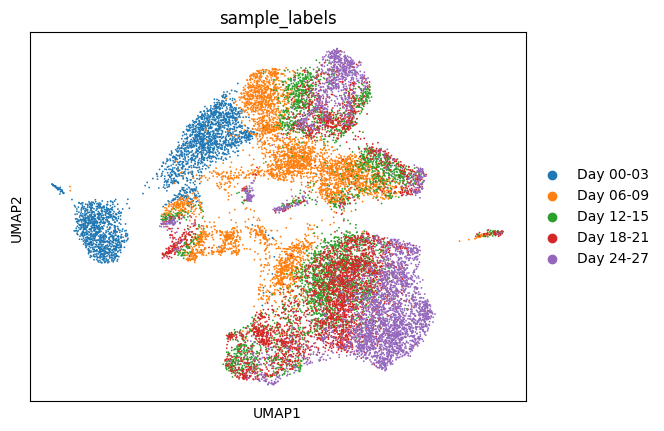

In [7]:
sc.pl.umap(adata, color="sample_labels")

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


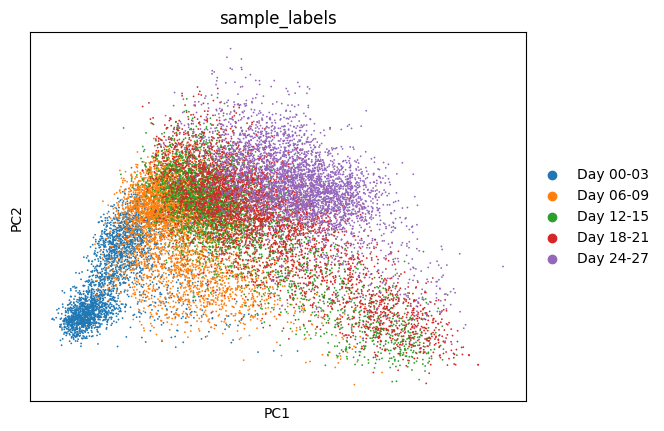

In [8]:
sc.pl.pca(adata, color="sample_labels")

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


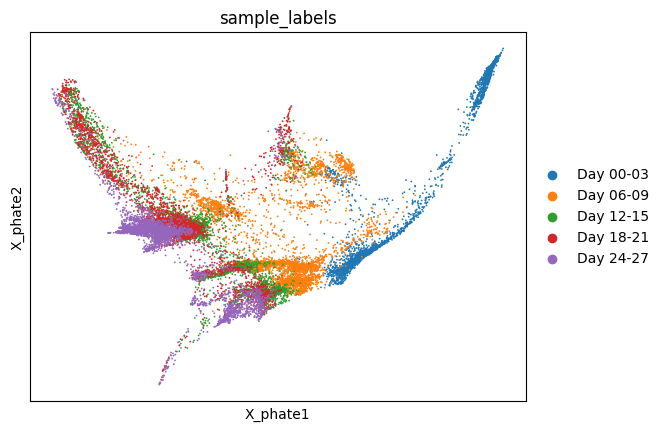

In [9]:
sc.pl.embedding(adata, basis="X_phate", color="sample_labels")

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


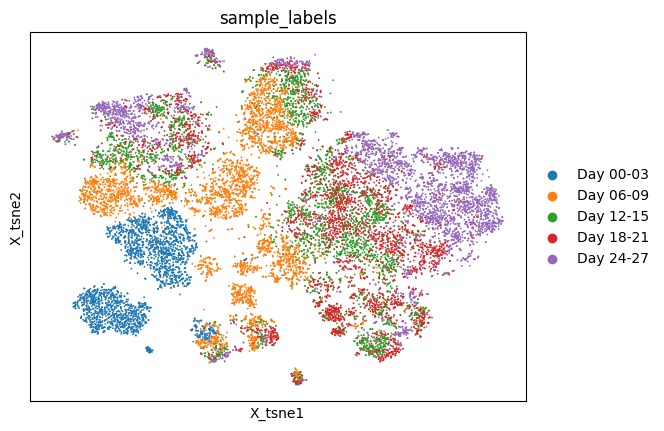

In [10]:
sc.pl.embedding(adata, basis="X_tsne", color="sample_labels")

**Use scanpy's highly variable gene selection pipeline**

In [11]:
adata.X = sparse.csr_matrix(np.exp(adata.X.A)-1)  # Go back to normalized
adata.X.sum(1)

matrix([[4134.0005],
        [4133.9995],
        [4133.9995],
        ...,
        [4134.0005],
        [4134.0005],
        [4133.9995]], dtype=float32)

In [12]:
adata.layers["X_norm"] = adata.X.copy()

Check scale and save data in standard format

In [13]:
sc.pp.log1p(adata) 

The data is log-normalized. Now select the highly-variable genes

In [14]:
sc.pp.highly_variable_genes(adata)

In [15]:
sc.pp.pca(adata, n_comps=50)                     # Perform PCA
sc.pp.neighbors(adata)                           # Compute neighborhood graph
sc.tl.umap(adata)  

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/umap/distances.py:108

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


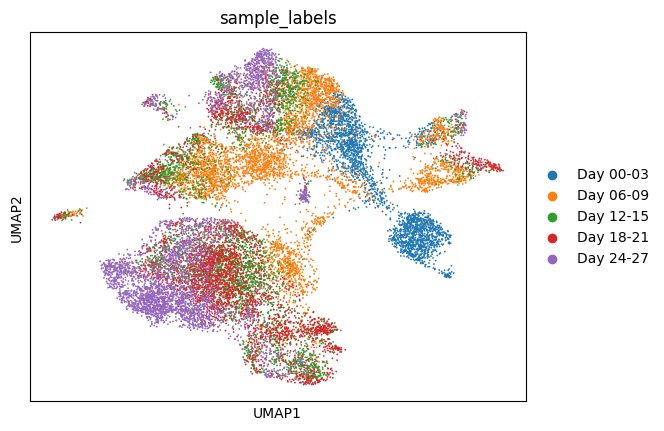

In [16]:
sc.pl.umap(adata, color="sample_labels")

In [17]:
adata.layers["X_log"] = adata.X.copy()

In [18]:
adata = adata[:, adata.var.highly_variable]

Make experimental time numeric

In [19]:
days = np.array([float(i.split(" ")[1].split("-")[0]) for i in adata.obs.sample_labels])

In [20]:
days = days / np.max(days)

In [21]:
adata.obs["experimental_time"] = days

/tmp/ipykernel_2690904/434766085.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["experimental_time"] = days


In [22]:
sc.write(DATA_DIR / "eb" / "processed"/ "eb_phat.h5ad", adata)

In [23]:
adata

AnnData object with n_obs × n_vars = 18203 × 1241
    obs: 'sample_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'dpt_pseudotime', '1d-phate', '1d-phate-normalized', 'experimental_time'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_name', 'gene_id', 'gene_name_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'diffmap_evals', 'iroot', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'sample_labels_colors', 'tsne', 'umap', 'hvg', 'pca'
    obsm: 'X_diffmap', 'X_pca', 'X_phate', 'X_phate_normalized', 'X_phate_real_time', 'X_phate_time', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'X_norm', 'X_log'
    obsp: 'connectivities', 'distances'